http://amunategui.github.io/concepts-in-pair-trading/

In this post, I want to share some simple ways of comparing stocks that are presumed related. My recommended approach for finding related companies is to use your own domain expertise. The second option is to use a site based on fundamental analysis that shows related companies (Google it, they’re lots out there like tipranks.com). I don’t recommend using pair-trading scanners as you’ll lose your shirt if you aren’t knowledgeable about the stock and sector - trader beware!

Once you have a few stocks in mind, you’re good to continue on with this exercise. Here we will use the ‘pair-trading’ classics of Coca-Cola vs. Pepsi, and FedEx vs. UPS.

Note: Everything discussed here is for educational purposes only.



In [62]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

There are plenty of sources to get free stock market data, Yahoo Finance is one of them. But all those who will want to do some serious research in this area should not rely on free data. You will eventually need a safe, reliable and currated source of stock data - no shortcuts here.



In [64]:
df = pd.read_csv('pairs_trading_b3/datasets/data.csv', index_col=0)
stock_data_raw = df[['TOTS3', 'VIVT4', 'CMIG4', 'ENBR3']].copy()

Make a copy of the data set before transforming it



In [65]:
stock_data = stock_data_raw.copy()

#### Plot paired stocks on different axes



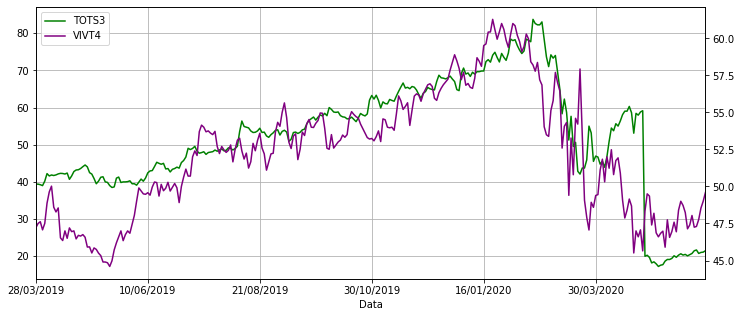

In [36]:
plt.figure(figsize=(12,5))
ax1 = stock_data['TOTS3'].plot(color='green', grid=True, label='TOTS3')
ax2 = stock_data['VIVT4'].plot(color='purple', grid=True, secondary_y=True, label='VIVT4')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

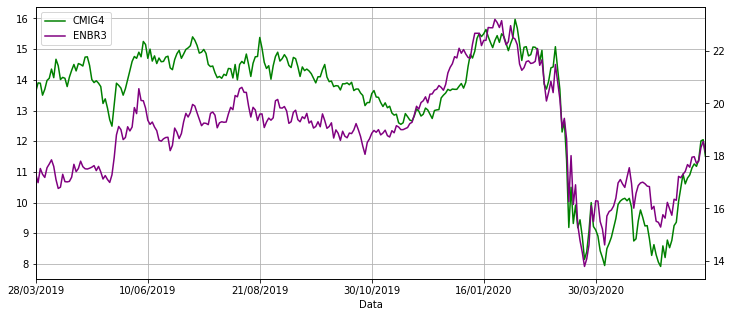

In [37]:
plt.figure(figsize=(12,5))
ax1 = stock_data['CMIG4'].plot(color='green', grid=True, label='CMIG4')
ax2 = stock_data['ENBR3'].plot(color='purple', grid=True, secondary_y=True, label='ENBR3')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

#### Normalize data

In order to compare moves between differently priced assets, we need to normalize the data.



#### Percent Change And Cumsum

A very simple way to do this is to transform price data into percentage changes and apply a rolling sum, known as a cumulative sum.

In [38]:
def normalize_and_accumulate_series(data):
    # take tail to drop head NA
    return data.pct_change().cumsum()

stock_data['TOTS3'] = normalize_and_accumulate_series(stock_data['TOTS3'])
stock_data['VIVT4'] = normalize_and_accumulate_series(stock_data['VIVT4'])
stock_data['CMIG4'] = normalize_and_accumulate_series(stock_data['CMIG4'])
stock_data['ENBR3'] = normalize_and_accumulate_series(stock_data['ENBR3'])

# remove first row with NAs 
stock_data = stock_data.tail(len(stock_data)-1)

In [39]:
stock_data

,TOTS3,VIVT4,CMIG4,ENBR3
Data,,,,
29/03/2019,0.000000,0.006143,0.020558,-0.019064
01/04/2019,-0.003807,0.008669,0.019839,0.012738
02/04/2019,-0.010177,-0.002881,-0.008239,0.000181
03/04/2019,0.020849,0.006467,0.005835,-0.006755
04/04/2019,0.071085,0.035093,0.027018,0.014781
...,...,...,...,...
04/06/2020,-0.007060,0.058879,-0.048044,0.105021
05/06/2020,-0.049937,0.068815,-0.028366,0.109536
08/06/2020,-0.036931,0.084934,0.025143,0.138749


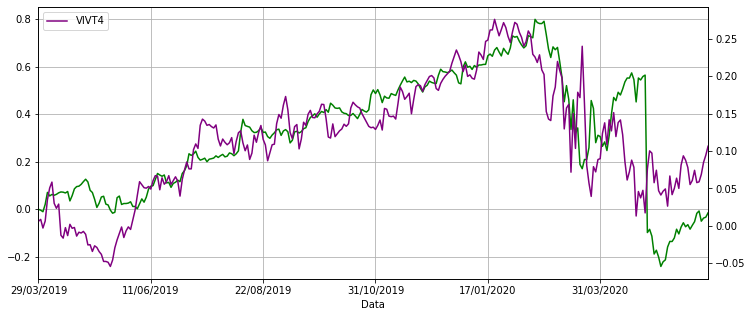

In [41]:
fig, ax = plt.subplots(figsize=(12,5))
stock_data['TOTS3'].plot(color='green', grid=True, label='TOTS3')
stock_data['VIVT4'].plot(color='purple', grid=True, secondary_y=True, label='VIVT4')
ax.grid(True)
plt.legend(loc=2)
plt.show()

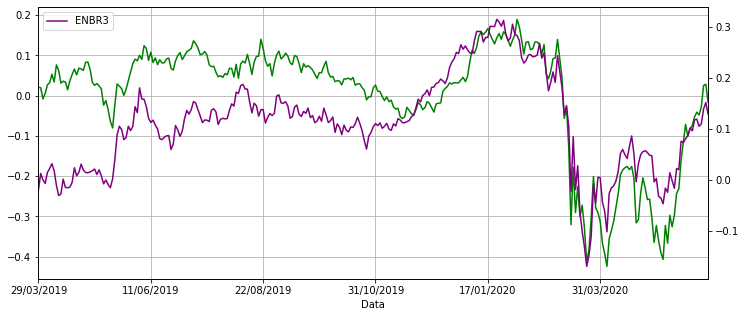

In [42]:
fig, ax = plt.subplots(figsize=(12,5))
ax1 = stock_data['CMIG4'].plot(color='green', grid=True, label='CMIG4')
ax2 = stock_data['ENBR3'].plot(color='purple', grid=True, secondary_y=True, label='ENBR3')
ax.grid(True)
plt.legend(loc=2)
plt.show()

#### Getting some statistical measurements

In [43]:
# pip install scipy
# pip install statsmodels
from statsmodels.tsa.stattools import coint

def corr(data1, data2):
    "data1 & data2 should be numpy arrays."
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr


In [44]:
stock_name_1 = 'TOTS3'
stock_name_2 = 'VIVT4'

score, pvalue, _ = coint(stock_data[stock_name_1], stock_data[stock_name_2])
correlation = corr(stock_data[stock_name_1], stock_data[stock_name_2])

print('Correlation between %s and %s is %f' % (stock_name_1, stock_name_2, correlation))
print('Cointegration between %s and %s is %f' % (stock_name_1, stock_name_2, pvalue))

Correlation between TOTS3 and VIVT4 is 0.802308
Cointegration between TOTS3 and VIVT4 is 0.003487


In [45]:
stock_name_1 = 'CMIG4'
stock_name_2 = 'ENBR3'

score, pvalue, _ = coint(stock_data[stock_name_1], stock_data[stock_name_2])
correlation = corr(stock_data[stock_name_1], stock_data[stock_name_2])

print('Correlation between %s and %s is %f' % (stock_name_1, stock_name_2, correlation))
print('Cointegration between %s and %s is %f' % (stock_name_1, stock_name_2, pvalue))


Correlation between CMIG4 and ENBR3 is 0.694659
Cointegration between CMIG4 and ENBR3 is 0.475450


#### Measuring separatation and spikes highlights

This is straighforward, we simply subtract the two related and normalized series



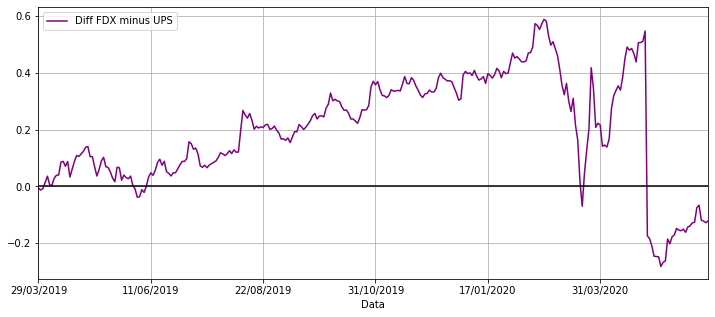

In [47]:
fig, ax = plt.subplots(figsize=(12,5))
(stock_data['TOTS3'] - stock_data['VIVT4']).plot(color='purple', label='Diff FDX minus UPS')
ax.grid(True)
ax.axhline(y=0, color='black', linestyle='-') 
plt.legend(loc=2)
plt.show()

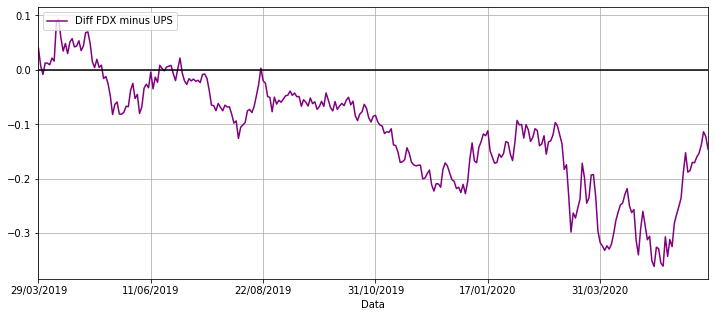

In [48]:
fig, ax = plt.subplots(figsize=(12,5))
(stock_data['CMIG4'] - stock_data['ENBR3']).plot(color='purple', label='Diff FDX minus UPS')
ax.grid(True)
ax.axhline(y=0, color='black', linestyle='-') 
plt.legend(loc=2)
plt.show()

Designing spike thresholds

In [50]:
# get the original data set
stock_data = stock_data_raw.copy()

In [52]:
def normalize_series(data):
    # take tail to drop head NA
    return data.pct_change()

stock_data['TOTS3'] = normalize_series(stock_data['TOTS3'])
stock_data['VIVT4'] = normalize_series(stock_data['VIVT4'])
stock_data['CMIG4'] = normalize_series(stock_data['CMIG4'])
stock_data['ENBR3'] = normalize_series(stock_data['ENBR3'])

# remove first row with NAs 
stock_data = stock_data.tail(len(stock_data)-1)

In [53]:
stock_data.head()

,TOTS3,VIVT4,CMIG4,ENBR3
Data,,,,
29/03/2019,0.000000,0.006143,0.020558,-0.019064
01/04/2019,-0.003807,0.002526,-0.000719,0.031802
02/04/2019,-0.006369,-0.011550,-0.028078,-0.012557
03/04/2019,0.031026,0.009348,0.014074,-0.006936
04/04/2019,0.050236,0.028626,0.021183,0.021537


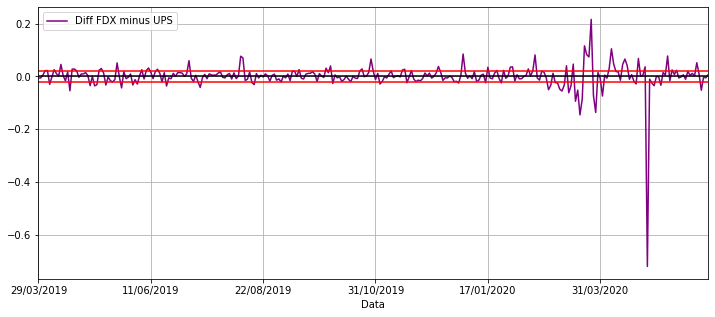

In [56]:
fig, ax = plt.subplots(figsize=(12,5))
(stock_data['TOTS3'] - stock_data['VIVT4']).plot(color='purple', label='Diff FDX minus UPS')
ax.grid(True)
ax.axhline(y=0, color='black', linestyle='-') 
ax.axhline(y=0.02, color='red', linestyle='-') 
ax.axhline(y=-0.02, color='red', linestyle='-')
plt.legend(loc=2)
plt.show()

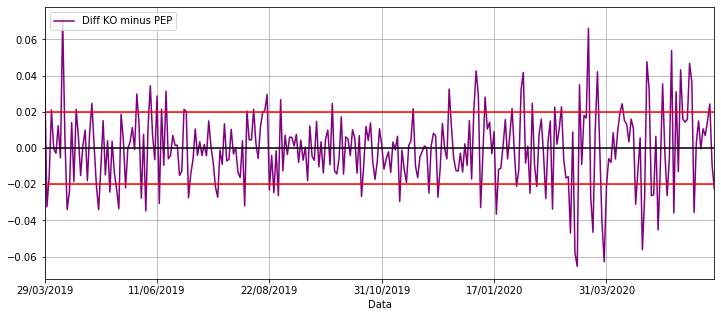

In [59]:
fig, ax = plt.subplots(figsize=(12,5))
(stock_data['CMIG4'] - stock_data['ENBR3']).plot(color='purple', label='Diff KO minus PEP')
ax.grid(True)
ax.axhline(y=0, color='black', linestyle='-')
ax.axhline(y=0.02, color='red', linestyle='-')
ax.axhline(y=-0.02, color='red', linestyle='-') 
plt.legend(loc=2)
plt.show()

In [60]:
stock_data_price = stock_data_raw.copy()

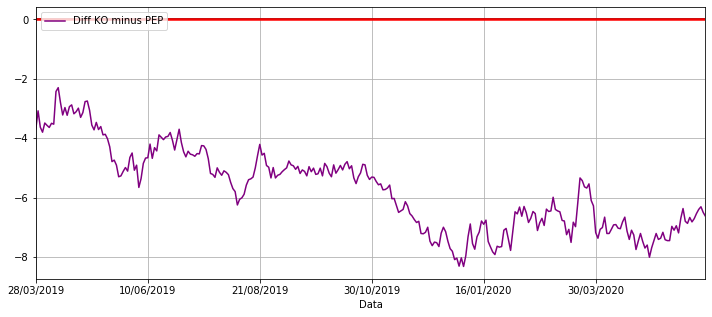

In [61]:
fig, ax = plt.subplots(figsize=(12,5))
(stock_data_price['CMIG4'] - stock_data_price['ENBR3']).plot(color='purple', label='Diff KO minus PEP')
ax.grid(True)
ax.axhline(y=0, color='black', linestyle='-')
ax.axhline(y=0.02, color='red', linestyle='-')
ax.axhline(y=-0.02, color='red', linestyle='-') 
plt.legend(loc=2)
plt.show()